Добрый день, уважаемые проверяющие!

В тексте не был указан стэк технологий для выполнения этого задания, поэтому я решил выполнить задание на **Python**, так как он гибкий и позволит выполнить более емкий анализ.

Пожалуйста, обратите внимание на *комментарии с пояснениями, ходом мыслей и выводами*. **Проверка не требует знаний языка**.

Спасибо за понимание и время, уделенное моей работе.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

1) Посчитать количество новых тикетов за каждый месяц и SLA за каждый месяц.

In [291]:
df = pd.read_csv("Тестовое задание — Аналитик - Количество и SLA.csv")
df['Дата создания тикета'] = pd.to_datetime(df['Дата создания тикета'], format='%d.%m.%Y %H:%M:%S')
df['СЛА'] = df['СЛА'].str.replace('%', '')
df['СЛА'] = df['СЛА'].str.replace(',', '.').astype('float')


In [79]:
df.set_index('Дата создания тикета').resample('M').agg({
    'Количество тикетов': 'sum',
    'СЛА': 'mean',
})

,Количество тикетов,СЛА
Дата создания тикета,,
2022-01-31,4683,90.818296
2022-02-28,6141,88.766067
2022-03-31,6740,53.999688
2022-04-30,6674,75.720362
2022-05-31,5619,88.914846
2022-06-30,5060,91.428028
2022-07-31,4035,80.194555
2022-08-31,4067,84.265705
2022-09-30,4694,76.536897


2) 1. Построить график *"Количество за весь период в динамике"*.
   2. SLA за весь период в динамике.

Не очень понятно что значит "за весь период", поэтому выполню с разными группировками.

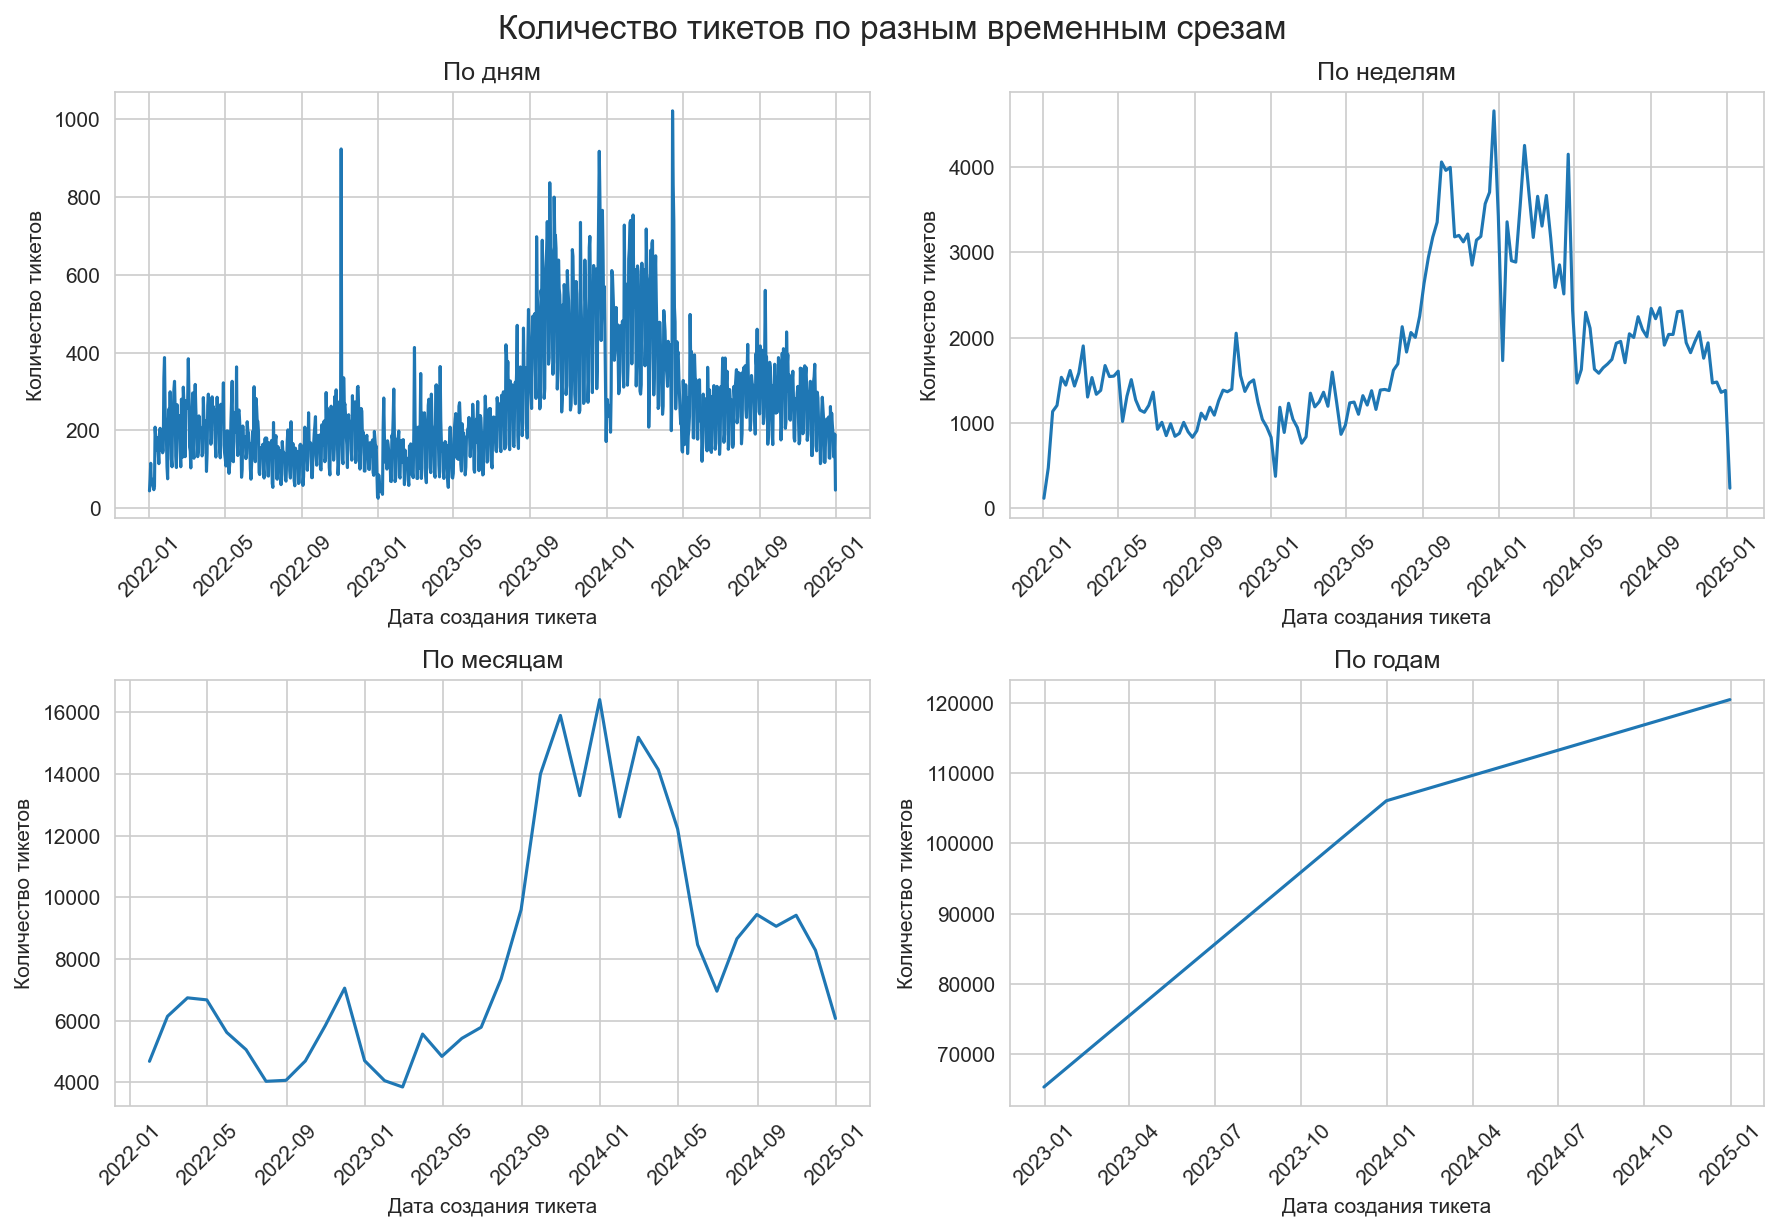

In [163]:
df['Дата создания тикета'] = pd.to_datetime(df['Дата создания тикета'])

freq_map = {
    'D': 'По дням',
    'W': 'По неделям',
    'M': 'По месяцам',
    'Y': 'По годам'
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=150)
axes = axes.flatten()

for i, (freq, title) in enumerate(freq_map.items()):
    data = df.set_index('Дата создания тикета').resample(freq).agg({'Количество тикетов': 'sum'})
    
    sns.lineplot(ax=axes[i], data=data, x=data.index, y='Количество тикетов')
    axes[i].set_title(title)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('Количество тикетов по разным временным срезам', fontsize=16, y=1.02);

Аналогично, выполню для СЛА.

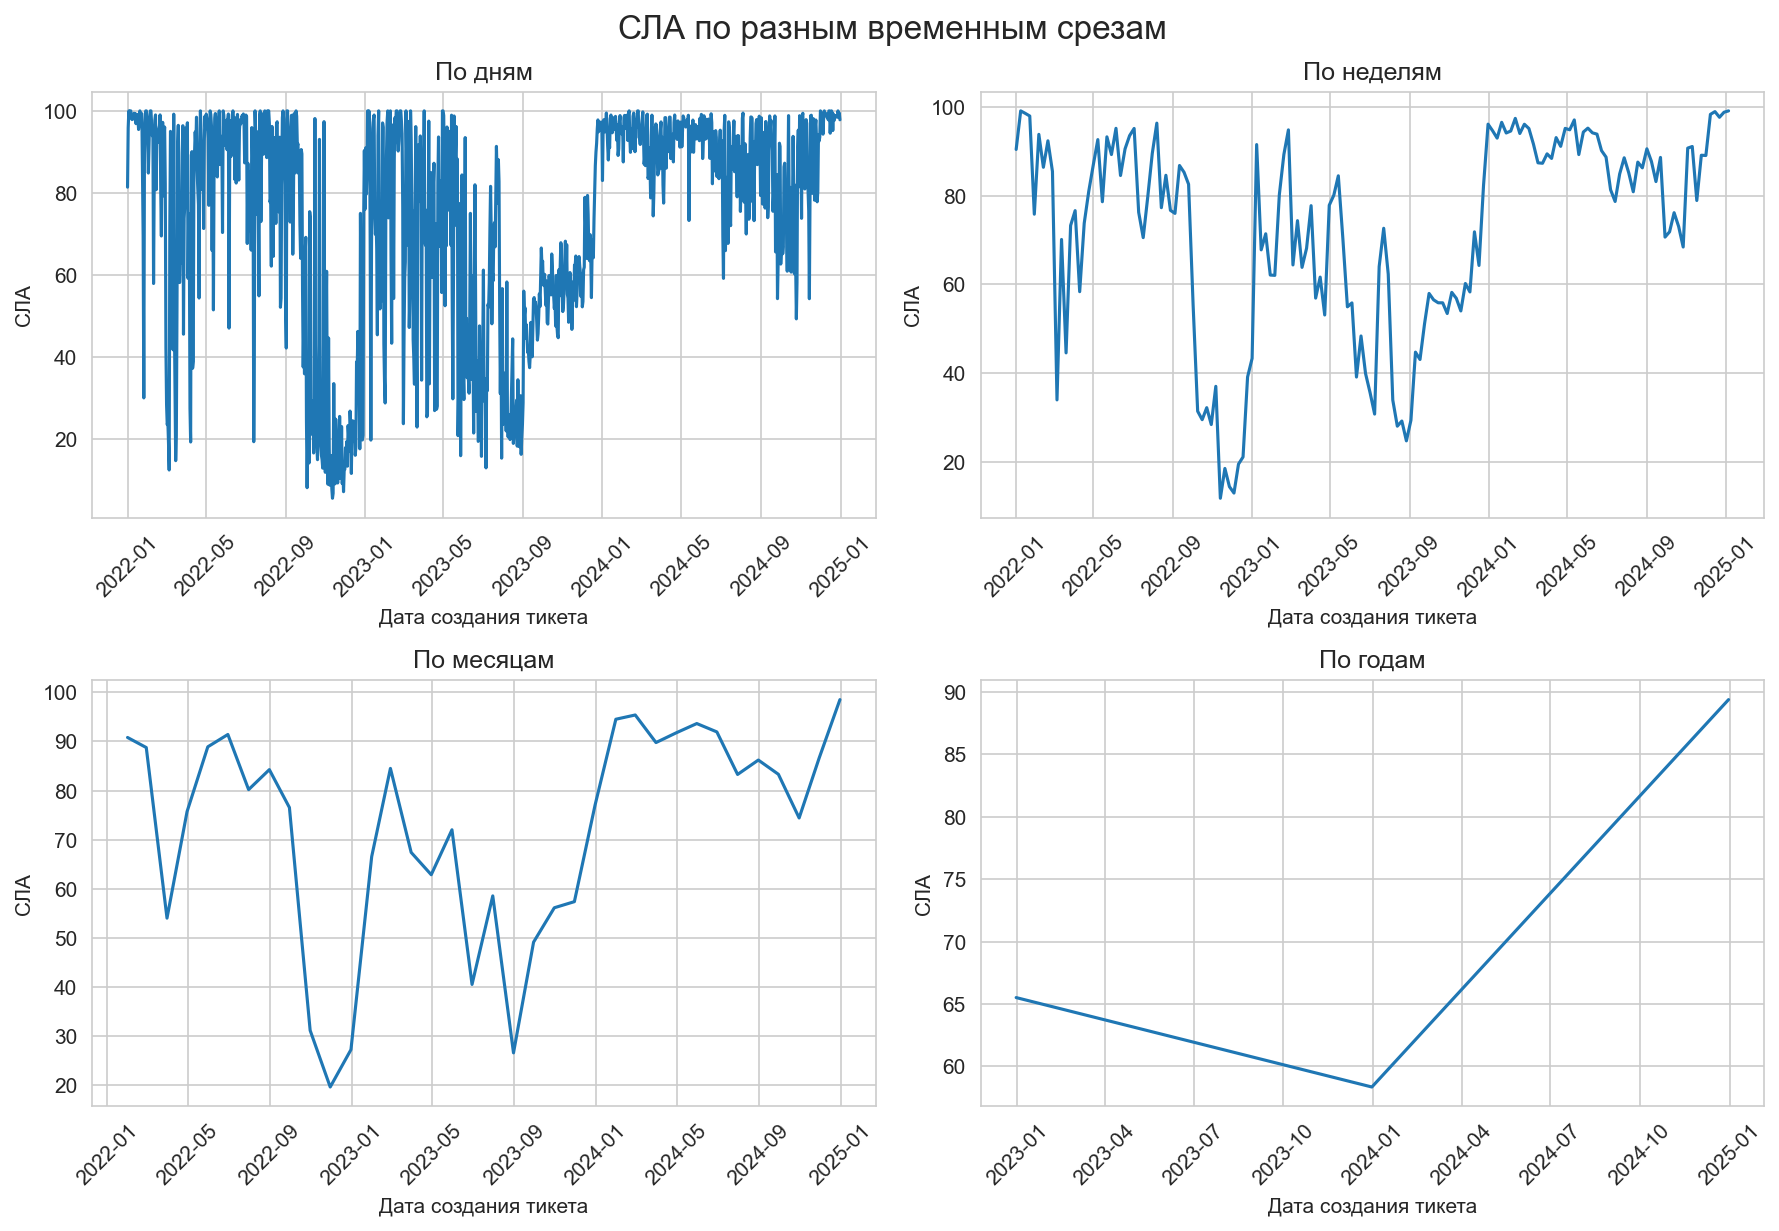

In [165]:
freq_map = {
    'D': 'По дням',
    'W': 'По неделям',
    'M': 'По месяцам',
    'Y': 'По годам'
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=150)
axes = axes.flatten()

for i, (freq, title) in enumerate(freq_map.items()):
    data = df.set_index('Дата создания тикета').resample(freq).agg({'СЛА': 'mean'})
    
    sns.lineplot(ax=axes[i], data=data, x=data.index, y='СЛА')
    axes[i].set_title(title)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('СЛА по разным временным срезам', fontsize=16, y=1.02);

3) 1. как ведёт себя количество тикетов в течение года;
   2. сравнить между собой 2022, 2023 и 2024 гг;
   3. корреляцию между нагрузкой и SLA.

С первым заданием отлично справится модель `Prophet`. Декомпозирую с ее помощью ряд с количеством тикетов.

In [202]:
from prophet import Prophet
import logging
from prophet.plot import plot_components

logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

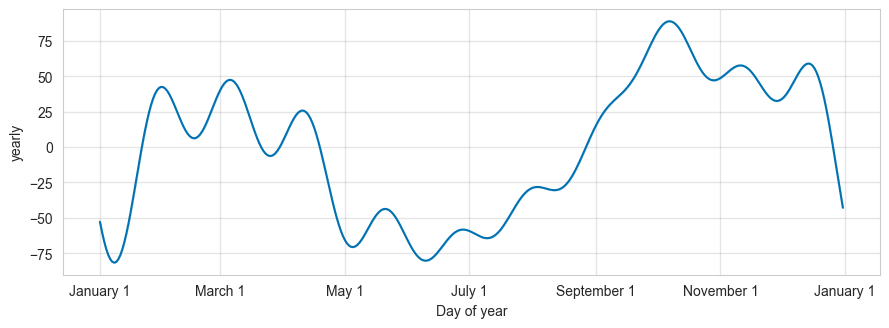

In [204]:
df['Дата создания тикета'] = pd.to_datetime(df['Дата создания тикета'])
data = df.set_index('Дата создания тикета').resample('D').sum().reset_index()
data = data.rename(columns={'Дата создания тикета': 'ds', 'Количество тикетов': 'y'})

m = Prophet()
m.fit(data)

forecast = m.predict(data[['ds']])

fig = plot_components(m, forecast)
for ax in fig.axes:
    if 'year' not in ax.get_xlabel().lower():
        ax.remove()
plt.tight_layout()
plt.show()


**Модель подобрала наиболее вероятную годовую сезонность.**

На графике видно:
- С середины января начинается рост
- С февраля по апрель - выход на плато
- Спад с мая до июля
- Постепенный рост до октября
- Плавный спад до середины декабря
- Резкий спад до середине января.

Для **второго задания** сравню друг с другом 2022, 2023 и 2024 года. Начну с **количества тикетов**. Агрегацию буду вести **по месяцам**.

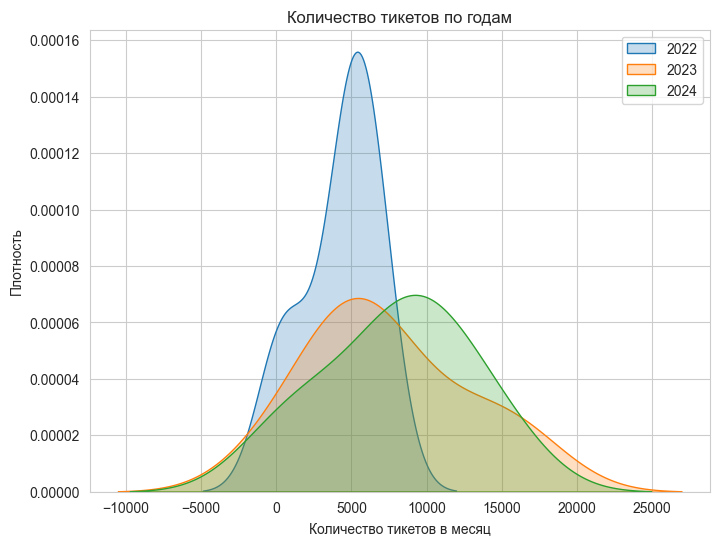

,2022,2023,2024
count,12.000000,12.000000,12.000000
mean,5442.666667,8839.583333,10039.833333
std,1052.227104,4782.427084,2844.381730
min,4035.000000,3850.000000,6072.000000
25%,4691.250000,5281.000000,8417.500000
50%,5339.500000,6573.500000,9237.500000
75%,6274.250000,13468.250000,12311.250000
max,7054.000000,16405.000000,15183.000000


In [251]:
df['Год'] = df['Дата создания тикета'].dt.year

data = {}

for year in [2022, 2023, 2024]:
    df_year = df[df['Год'] == year].set_index('Дата создания тикета')
    
    monthly_sum = df_year.resample('M')['Количество тикетов'].sum()
    
    data[year] = monthly_sum

plt.figure(figsize=(8, 6))

for year in result_df.columns:
    sns.kdeplot(result_df[year].dropna(), label=str(year), fill=True)
    sns

plt.title('Количество тикетов по годам')
plt.xlabel('Количество тикетов в месяц')
plt.ylabel('Плотность')
plt.legend()
plt.show()


# Создаем итоговый датафрейм из словаря
result_df = pd.DataFrame(data)
result_df = result_df.describe()
result_df

- В 2022 году в среднем было около **5443 тикетов в месяц** с относительно стабильным разбросом (стандартное отклонение ≈ 1052). Минимум — 4035, максимум — 7054.

- В 2023 году среднее количество значительно выросло до **8840 тикетов в месяц**, но вариативность тоже возросла — стандартное отклонение почти в 4,5 раза выше (≈ 4782), что указывает на сильные колебания между месяцами. Например, 25-й перцентиль всего 5281, а 75-й — аж 13468.

- В 2024 году среднее ещё выше — **около 10040 тикетов**, при этом разброс уменьшился (стандартное отклонение ≈ 2844) по сравнению с 2023 годом, что говорит о более устойчивом объёме работы. Минимум выше, чем у предыдущих лет (6072), максимум чуть меньше, чем в 2023 (15183).

**Аналогично для SLA.**

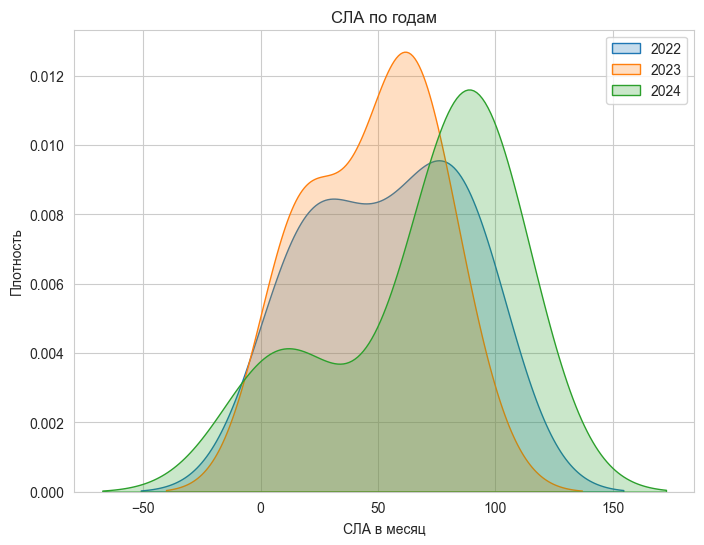

,2022,2023,2024
count,12.000000,12.000000,12.000000
mean,67.378647,59.878438,89.124562
std,27.043024,15.912878,6.686781
min,19.584782,26.543078,74.415331
25%,48.279024,54.362268,85.490059
50%,78.365726,60.691395,90.765967
75%,88.803262,68.549444,93.876146
max,91.428028,84.515024,98.533089


In [259]:
df['Год'] = df['Дата создания тикета'].dt.year

data = {}

for year in [2022, 2023, 2024]:
    df_year = df[df['Год'] == year].set_index('Дата создания тикета')
    
    monthly_sum = df_year.resample('M')['СЛА'].mean()
    
    data[year] = monthly_sum

result_df = pd.DataFrame(data)
result_df = result_df.describe()

plt.figure(figsize=(8, 6))

for year in result_df.columns:
    sns.kdeplot(result_df[year].dropna(), label=str(year), fill=True)
    sns

plt.title('СЛА по годам')
plt.xlabel('СЛА в месяц')
plt.ylabel('Плотность')
plt.legend()
plt.show()

result_df

- В 2022 году **средний уровень SLA — 67.4%**, но с высокой нестабильностью (стандартное отклонение ≈ 27.0). Диапазон — от крайне низких **19.6%** до довольно высоких **91.4%**. Это говорит о сильных провалах в отдельных месяцах, несмотря на отдельные удачные периоды.

- В 2023 году **средний SLA — 59.9%**, немного ниже, чем в 2022. Однако разброс снизился (std ≈ 15.9), что указывает на более согласованную, но всё ещё нестабильную работу. Минимум — 26.5%, максимум — 84.5%.

- В 2024 году **существенный рост до 89.1%** в среднем, с высокой стабильностью (std всего ≈ 6.7). Минимальное значение — 74.4%, максимальное — 98.5%, что говорит о высоком и равномерном уровне исполнения SLA по всем месяцам.

За период с 2022 по 2024 год **наблюдается устойчивый рост объёмов работы** — среднее количество тикетов выросло почти вдвое (с ~5400 до ~10000 в месяц). При этом 2023 год выделяется высокой нестабильностью нагрузки, тогда как в 2024 объёмы остаются высокими, но становятся более предсказуемыми.

Параллельно с ростом нагрузки существенно **улучшилось качество исполнения**:
SLA вырос с нестабильных **67% в 2022** до **почти 90% в 2024**, при этом уровень вариативности исполнения значительно снизился. Особенно впечатляет, что **высокое качество** в 2024 удалось сохранить даже **при значительной загрузке**.

**Третье задание** - найти корреляцию между нагрузкой и СЛА.

In [293]:
df[['СЛА', 'Количество тикетов']].corr()

,СЛА,Количество тикетов
СЛА,1.000000,0.004185
Количество тикетов,0.004185,1.000000


В исходных данных корреляция между количеством тикетов и СЛА **отсутствует**. Дампирование эффекта и группировка значений по дате лишены логики. Могу заключить, что качество и нагрузка друг с другом **никак не связаны**.